# PHẦN 1: LÝ THUYẾT PHƯƠNG PHÁP
## Ý tưởng:
- Là phương pháp giải quyết bài toán tối ưu hoá dựa trên chiến lược "tham" bằng cách luôn chọn giá trị tốt nhất tại mỗi bước và kỳ vọng rằng khi kết thúc thuật toán ta thu được lời giải tối ưu cho bài toán

## Lược đồ phương pháp:
- B1: Xác định tập các đối tượng cho bài toán
- B2: Chọn ra giá trị tối ưu tại mỗi bước
- B3: Lặp lại bước 2 cho đến khi thu được lời giải tối ưu cho bài toán

## Pseudo code:
- Greed(A) = (A = tập các phương án)
-   S = null;
-   while(A != 0 && !Is_solution(S)) { (chừng nào A = null và chưa thu được lời giải)
-       x = BestSelect(A);
-       A = A \ {x};
-       if(Acceptable(S, x))
-          Integrate(S, x)
-    endwhile;
- return S;
- End
- }

## Ưu điểm:
- Đơn giản, dễ hiểu, hiệu quả
## Nhược điểm: 
- Không đảm bảo tìm được lời giải tối ưu cho toán bộ bài toán và có thể mắc kẹt trong vòng lặp vô hạn.

# PHẦN 2: BÀI TẬP LẬP TRÌNH
## Bài 1: Bài tập đổi tiền
* Phân tích theo bài giảng:
- INPUT: cList = {a0, a1, a2,..an} - các mệnh giá tiền, amount - số tiền cần đổi
- OUTPUT: Số lượng ít nhất các đồng tiền có thể trả lại số tiền cần đổi, result = {k1, k2,..kn}

* Chương trình cho thuật toán

In [1]:
def changeCoin(cList, amount):
    result = [0] * len(cList)
    cList.sort(reverse = True)

    i = 0
    while amount > 0 and i < len(cList):
        k = amount // cList[i]
        amount = amount - k * cList[i]
        result[i] = k
        i = i + 1

    if amount > 0:
        return -1
    else:
        return cList, result

cList = [10, 20, 50, 100, 200, 500]
amount = 3600

print("Số tiền cần đổi: ",amount)
cList, result = changeCoin(cList, amount)
print("Số tiền sau khi đổi: ")
print("Mệnh giá:",cList)
print("Số lượng:" ,result)


Số tiền cần đổi:  3600
Số tiền sau khi đổi: 
Mệnh giá: [500, 200, 100, 50, 20, 10]
Số lượng: [7, 0, 1, 0, 0, 0]


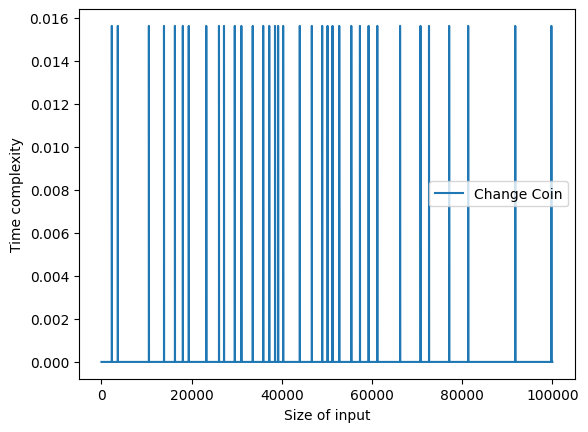

In [2]:
from numpy.random import randint
import random
import matplotlib.pyplot as mp
from time import process_time 


sizes = []
times = []
cList = [10, 20, 50, 100, 200, 500]
for size in range(1, 100000):
  amount = random.randint(1, 500000)

  start = process_time()
  changeCoin(cList, amount)
  end = process_time()

  sizes.append(size)
  times.append(end-start)

mp.xlabel('Size of input')
mp.ylabel('Time complexity')
mp.plot(sizes, times, label = "Change Coin")
mp.legend()

# Bài 2: Bài toán xếp balo
## Phân tích theo bài giảng

* INPUT:
dictItems = {value: weight}, bảng băm với cặp (key, value) là value : weight
T - trọng lượng tối đa mà balo có thể chứa được

* OUTPUT: 
weights = {r1, r2,...rn} - các vật cho vào balo
num = {k1,...k2} - số lượng vật tương ứng
sumValue = tổng giá trị tương ứng cho phương án

* Chương trình cho bài toán

In [3]:
def knapsack(dictItems, T):
    # Sắp xếp dictItems theo giá trị của key (giá trị của sản phẩm)
    dictItems = dict(sorted(dictItems.items(), reverse = True))

    vList = list(dictItems.keys())
    wList = list(dictItems.values())

    i = 0
    weighs = []
    nums = []
    sumValue = 0
    while T > 0 and i < len(wList):
        k = T // wList[i]
        weighs.append(wList[i])
        nums.append(k)

        sumValue = sumValue + k * vList[i]
        T = T - k * wList[i]
        i = i + 1
    return weighs, nums, sumValue

dictItems = {18: 3, 30: 7, 60: 5, 7: 1, 130 : 6, 10 : 8}
T = 20
weighs, nums, sumValue = knapsack(dictItems, T)
print("Weights:", weighs)
print("Số lượng:", nums)
print("Tổng giá trị đạt được:", sumValue) 


# Expect: 404
# 3 vật có khối lượng 6 có giá trị là: 3 * 130 = 390
# 2 vật có khối lượng 1 có giá trị là: 2 * 7 = 14 
# Tổng = 404

Weights: [6, 5, 7, 3, 8, 1]
Số lượng: [3, 0, 0, 0, 0, 2]
Tổng giá trị đạt được: 404


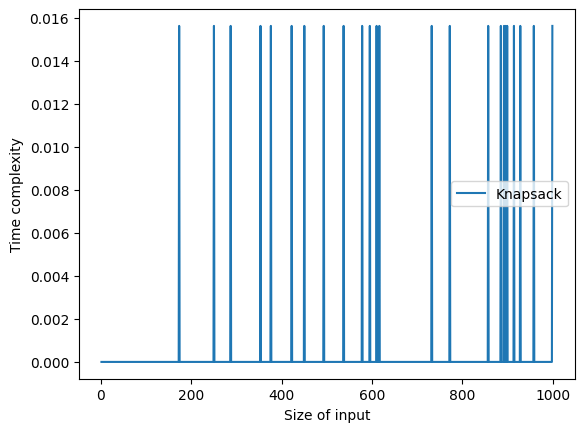

In [4]:
from numpy.random import randint
import random
import matplotlib.pyplot as mp
from time import process_time 


sizes = []
times = []

T = 2000
for size in range(1, 1000):
  dictItems = dict()

  for i in range(0, size):
    value = random.randint(1, 1000)
    weigh = random.randint(1, 1000)
    dictItems[value] = weigh

  start = process_time()
  knapsack(dictItems, T)
  end = process_time()

  sizes.append(size)
  times.append(end-start)

mp.xlabel('Size of input')
mp.ylabel('Time complexity')
mp.plot(sizes, times, label = "Knapsack")
mp.legend()

# Thuật toán Prim
## Phân tích theo bài giảng
* Input:
- Ma trận kề adjMatrix
* Output:
- List MST chứa cạnh của cây khung nhỏ nhất
* Thuật toán
B1: Bắt đầu từ 1 đỉnh bất kỳ, tìm cạnh có trọng số nhỏ nhất kề với nó
B2: Thêm đỉnh đó vào xâu E 
B3: Tìm cạnh có trọng số nhỏ nhất với 1 trong những đỉnh đã thêm vào E
B4: Lặp lại B3 cho đến khi duyệt hết các đỉnh
## Chương trình cho thuật toán

In [5]:
import sys

def prim(adjMatrix):
    n = len(adjMatrix)

    # Bắt đầu từ đỉnh đầu tiên
    MST = [0]
    edMST = []

    # Tổng trọng số
    sumWeight = 0
    
    for i in range(1, n):
        minEdge = sys.maxsize
        nearestVer = -1
        curVertex = -1
        
        # Tìm cạnh gần nhất
        for v in MST:
            for j in range(n):
                if adjMatrix[v][j] != 0 and j not in MST and adjMatrix[v][j] < minEdge:
                    minEdge = adjMatrix[v][j]
                    curVertex = v
                    nearestVer = j
        
        MST.append(nearestVer)
        sumWeight += minEdge
        edMST.append((curVertex, nearestVer))
        
    return edMST, sumWeight

# Ví dụ trong slide
adjMatrix = [[0, 7, 0, 5, 0, 0, 0],
             [7, 0, 8, 9, 7, 0, 0],
             [0, 8, 0, 0, 5, 0, 0], 
             [5, 9, 0, 0, 15, 6, 0], 
             [0, 7, 5, 15, 0, 8, 9],
             [0, 0, 0, 6, 8, 0, 11],
             [0, 0, 0, 0, 9, 11, 0]]

print("Ma trận kề:\n", adjMatrix)
edMST, sumWeight = prim(adjMatrix)
print("Cây khung nhỏ nhất áp dụng thuật toán Prim:", edMST)
print("Tổng trọng số của cây khung:", sumWeight)


Ma trận kề:
 [[0, 7, 0, 5, 0, 0, 0], [7, 0, 8, 9, 7, 0, 0], [0, 8, 0, 0, 5, 0, 0], [5, 9, 0, 0, 15, 6, 0], [0, 7, 5, 15, 0, 8, 9], [0, 0, 0, 6, 8, 0, 11], [0, 0, 0, 0, 9, 11, 0]]
Cây khung nhỏ nhất áp dụng thuật toán Prim: [(0, 3), (3, 5), (0, 1), (1, 4), (4, 2), (4, 6)]
Tổng trọng số của cây khung: 39


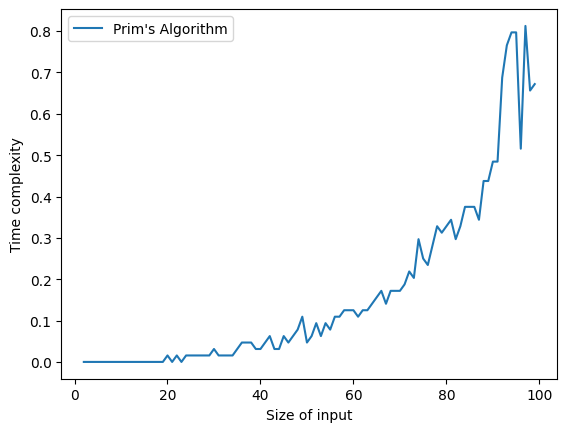

In [6]:
import numpy as np
import matplotlib.pyplot as mp
from time import process_time

sizes = []
times = []


def createAdjMatrix(lenMatrix):
    matrix = np.zeros((lenMatrix, lenMatrix))
    for i in range(0, lenMatrix):
        for j in range(0, i):
            matrix[i][j] = random.randint(1, 100)
            matrix[j][i] = matrix[i][j]
    return matrix


for size in range(2, 100):
    adjMatrix = createAdjMatrix(size)

    start = process_time()
    prim(adjMatrix)
    end = process_time()

    sizes.append(size)
    times.append(end-start)

mp.xlabel('Size of input')
mp.ylabel('Time complexity')
mp.plot(sizes, times, label="Prim's Algorithm")
mp.legend()
